<a href="https://colab.research.google.com/github/Ash-git-create/Data_Analytics_1_WiSe2024/blob/main/Exercise%20Day%207-%20Group%20Excercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import shap
from sklearn.ensemble import IsolationForest

data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [ ]:
print(f"Missing values: {data.isnull().sum().sum()}")
data = data.dropna()

Missing values: 0


Shape after outlier removal: (18239, 82)
Selected features: Index(['mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass',
       'wtd_gmean_atomic_mass', 'range_fie', 'std_fie',
       'wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius',
       'range_ElectronAffinity', 'std_ElectronAffinity'],
      dtype='object')
Linear Regression - R2: 0.57, RMSE: 22.83
Cross-Validation R2 Scores: [0.57006981 0.57857016 0.57256434 0.57431614 0.58651252]
Mean CV R2 Score: 0.58
Ridge Regression - R2: 0.57, RMSE: 22.83
Lasso Regression - R2: 0.57, RMSE: 22.84
Polynomial Regression - R2: 0.67, RMSE: 20.06


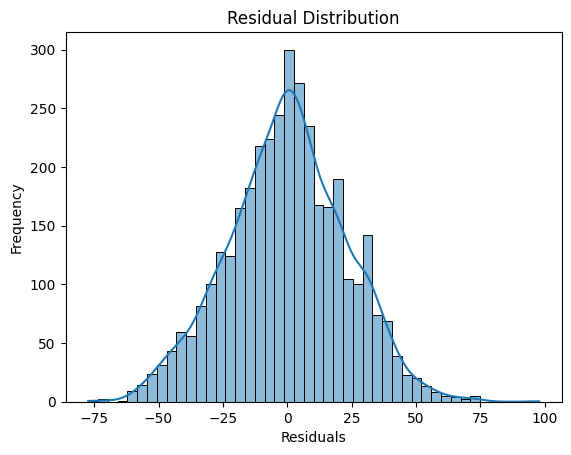

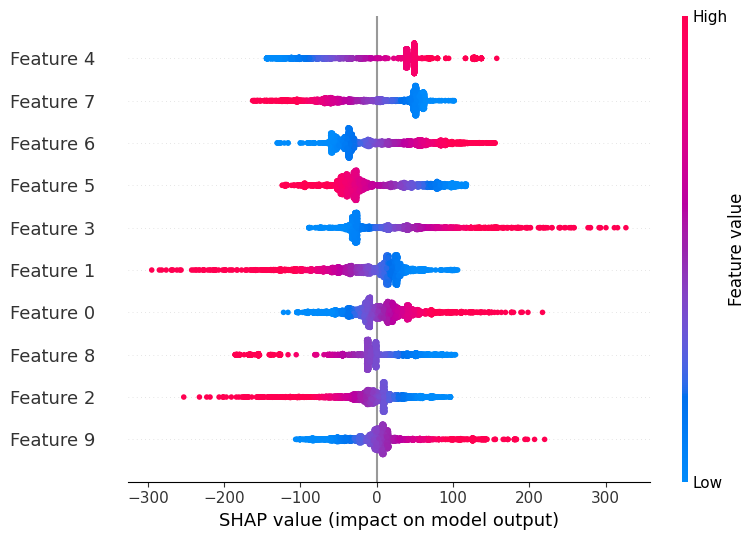

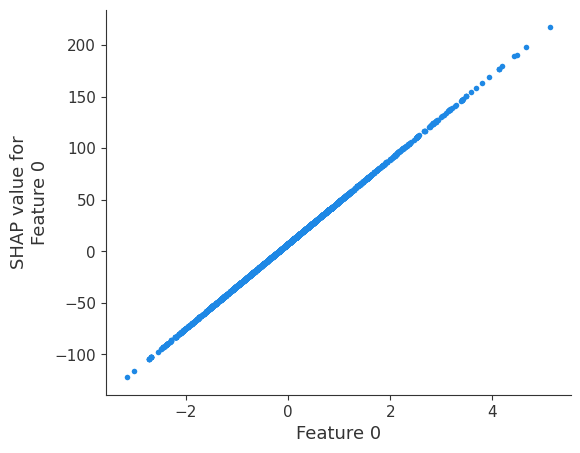

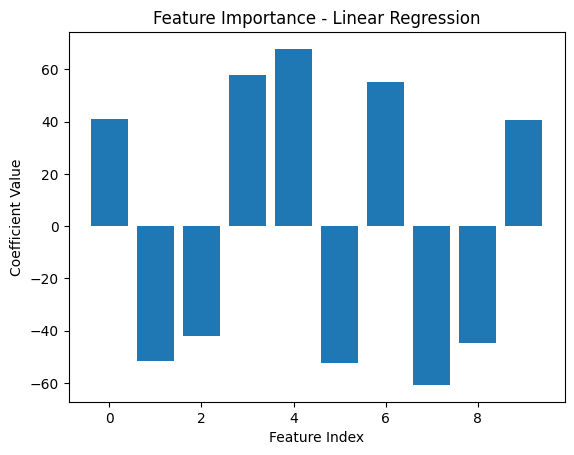

Best Ridge Alpha: 0.1


In [ ]:
iso = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso.fit_predict(data)
data = data[outlier_preds == 1]
print(f"Shape after outlier removal: {data.shape}")

## Feature scaling
X = data.drop("critical_temp", axis=1)
y = data["critical_temp"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Feature selection using Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
X_selected = rfe.fit_transform(X_scaled, y)
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Build and evaluate models
## Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation metrics
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression - R2: {lr_r2:.2f}, RMSE: {lr_rmse:.2f}")

## K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X_selected, y, cv=kf, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {np.mean(cv_scores):.2f}")

# Enhance the model
## Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
print(f"Ridge Regression - R2: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")

## Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
print(f"Lasso Regression - R2: {lasso_r2:.2f}, RMSE: {lasso_rmse:.2f}")

## Polynomial Regression
poly = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly, LinearRegression())
poly_model.fit(X_train, y_train)
poly_y_pred = poly_model.predict(X_test)

poly_r2 = r2_score(y_test, poly_y_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_y_pred))
print(f"Polynomial Regression - R2: {poly_r2:.2f}, RMSE: {poly_rmse:.2f}")

# Visualizations
## Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## SHAP Analysis
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

shap_values_array = shap_values.values

shap.dependence_plot(0, shap_values_array, X_test, interaction_index=None)


## Feature Importance
plt.bar(range(len(lr.coef_)), lr.coef_)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance - Linear Regression")
plt.show()

# Hyperparameter tuning for Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
